In [146]:
# 출력이 너무 길어지지 않게하기 위해 찍지 않도록 했으나 
# 실제 학습 할 때는 아래 두 줄을 주석처리 하는 것을 권장한다.
#s
import warnings
warnings.filterwarnings('ignore')

In [147]:
import pandas as pd
import numpy as np
print(pd.__version__)
print(np.__version__)
# pandas 에서 데이터 뽑고, 말뭉치를 뽑아보면 통으로 분석 못 하니까 형태소로 나누는데 나눈 거 중에
#의미 있는 게 서술어, 나 콜라 먹었다.
#뽑아 내는 거 - wordcloud, konlpy



1.1.1
1.18.5


In [7]:
# pandas 설정: 모든 row와 모든 column을 출력하게 하고, 각 column 별 출력되는 글자수는 50자 이내 글자수를 50개로 두고, head tail
pd.set_option('display.max_rows', None, 'display.max_columns', None, 'display.max_colwidth', 50)

In [8]:
# 위의 설정으로 간단하게 보는 df_specific
df_specific = pd.read_csv("/Users/jupiter/Desktop/Exchange_proj/df_specific_wrangle.csv", encoding="utf-8")
df_specific.head(3)

,대학코드,대학명,gen_info,env_info,food_info,study_info,office_info,facil_info,mhct_info,help_info,etc_info
0,AR000004,Universidad del Salvador,아르헨티나의 대다수 대학교는 한국처럼 캠퍼스가 있는 것이 아니라 도시 내에 몇개의 ...,대학교가 도시 여러곳에 분포하고 있으므로 각기 다르다. 하지만 남녀를 불문하고 부에...,기숙사는 학교에서 제공하지 않고 두가지 옵션이 주어진다. 홈스테이 혹은 게스트 하우...,아르헨티나에서의 대학 수업은 주로 오전 혹은 저녁에 있다. 대부분의 학생들이 일을하...,EL SALVADOR대학교는 국제 교육부가 잘 되있는 학교이다. 아르헨티나 대학교들...,부대시설로는 헬스장이 있다고 알고 있으나 시내와 먼 곳에 있었다. 동아리는 몇가지 ...,딱히 컬쳐쇼크를 받을 만 한 요소는 없었던 것 같다. 하지만 처음에 언어적인 면에서...,"살바도르 대학교 국제처에서 비자문제나 숙소문제(홈스테이경우) 등은 해결해 주고, 특...",NaN
1,AU000019,Australian National University,"ANU has a very big campus, but unlike Yonsei, ...","The city center, called CIVIC, is 20min walk a...","There are many housing options, but I chose to...","In my personal opinions, classes are generally...","Overall, I did not have to ask for help much f...","There were many clubs for you to join at ANU, ...",I did have some culture shock during my first ...,"I was helped a lot, especially during the firs...","Overall, my stay in Australia has been nothing..."
2,AU000001,Bond University,"Bond대학교는 휴양지로 유명한 골드코스트에 위치해있습니다. 서퍼스 파라다이스, 브...",학교 주변은 조용하고 깨끗한 평화로운 전원마을의 느낌입니다. 학교에서 5분정도 걸어...,거주형태는 크게 On Campus와 Off Campus로 나뉩니다. 저는 기숙사에 ...,"수업은 보통 4개의 수업을 듣습니다. 저는 Chinese1, Australian p...",교환생활 중 국제교육부와 연락할 일은 없었습니다. 교환학생을 가서 따로 국제교육부와...,학기초에 동아리 박람회식으로 여러 동아리들의 부스가 세워집니다. 관심 있는 동아리에...,특별히 culture shock이라기 보다는 정말 다양한 문화를 접하는 것 자체가 ...,"수업관련해서는 교수님께 질문을 해도 친절하게 알려주시고, 또 교내에 과제나 발표준비...",Bond와 그 동네를 생각하면 여유롭고 평화로웠던 분위기가 아직도 생생해요. 여기서...


In [9]:
df_ranking_specific = pd.read_csv("/Users/jupiter/Desktop/Exchange_proj/df_univ_wrangled.csv", encoding="utf-8")
df_ranking_specific.head(7)

,대학코드,국가,대학명,파견구분,협정형태,NUM_VISITS,BERT_SUM,RNN_SUM,BERT_AVG,RNN_AVG,BERT_PLUS_RNN_SCORE,COLLEGE_LINK
0,AF000001,AFGHANISTAN,Kabul University,교환학생,교환대학,NaN,NaN,NaN,NaN,NaN,NaN,http://oia.yonsei.ac.kr/partner/expReport.asp?...
1,AR000001,ARGENTINA,Universidad Blas Pascal,교환학생,ISEP,NaN,NaN,NaN,NaN,NaN,NaN,http://oia.yonsei.ac.kr/partner/expReport.asp?...
2,AR000002,ARGENTINA,Universidad Catolica de Cordoba,교환학생,ISEP,NaN,NaN,NaN,NaN,NaN,NaN,http://oia.yonsei.ac.kr/partner/expReport.asp?...
3,AR000003,ARGENTINA,Universidad de Palermo,교환학생,ISEP,NaN,NaN,NaN,NaN,NaN,NaN,http://oia.yonsei.ac.kr/partner/expReport.asp?...
4,AR000004,ARGENTINA,Universidad del Salvador,교환학생,ISEP,1.0,0.0,0.399670,0.00000,0.399670,0.119901,http://oia.yonsei.ac.kr/partner/expReport.asp?...
5,AR000005,ARGENTINA,University of Buenos Aires,교환학생,교환대학,NaN,NaN,NaN,NaN,NaN,NaN,http://oia.yonsei.ac.kr/partner/expReport.asp?...
6,AU000019,AUSTRALIA,Australian National University,교환학생,교환대학,27.0,17.0,17.952732,0.62963,0.664916,0.640216,http://oia.yonsei.ac.kr/partner/expReport.asp?...


In [10]:
df_ranking = pd.read_csv("/Users/jupiter/Desktop/Exchange_proj/df_univ_ranking.csv", encoding="utf-8")
df_ranking.head(2)

,index,대학코드,국가,대학명,파견구분,협정형태,NUM_VISITS,BERT_SUM,RNN_SUM,BERT_AVG,RNN_AVG,BERT_PLUS_RNN_SCORE,COLLEGE_LINK
0,376,CH000004,SWITZERLAND,University of Lausanne,교환학생,교환대학ISEP,8.0,8.0,6.659102,1.0,0.832388,0.949716,http://oia.yonsei.ac.kr/partner/expReport.asp?...
1,284,MX000004,MEXICO,Instituto Tecnologico y de Estudios Superiores...,교환학생,교환대학ISEP,7.0,7.0,5.665700,1.0,0.809386,0.942816,http://oia.yonsei.ac.kr/partner/expReport.asp?...


In [11]:
df_ranking.tail(2)

,index,대학코드,국가,대학명,파견구분,협정형태,NUM_VISITS,BERT_SUM,RNN_SUM,BERT_AVG,RNN_AVG,BERT_PLUS_RNN_SCORE,COLLEGE_LINK
293,383,TW000005,TAIWAN,"National Taiwan University, College of Management",교환학생,교환대학,6.0,2.0,3.883967,0.333333,0.647328,0.427532,http://oia.yonsei.ac.kr/partner/expReport.asp?...
294,354,ES000017,SPAIN,Universitat Autonoma de Barcelona,교환학생,교환대학,7.0,0.0,4.854875,0.000000,0.693554,0.208066,http://oia.yonsei.ac.kr/partner/expReport.asp?...


In [12]:
df_ranking['국가'].value_counts()

UNITED STATES         116
JAPAN                  23
CANADA                 17
NETHERLANDS            14
AUSTRALIA              13
UNITED KINGDOM         13
FRANCE                 12
GERMANY                11
CHINA                  10
SPAIN                   7
AUSTRIA                 6
SWEDEN                  6
NEW ZEALAND             5
HONG KONG               5
ITALY                   5
TAIWAN                  4
FINLAND                 4
SINGAPORE               3
SWITZERLAND             3
RUSSIAN FEDERATION      3
IRELAND                 2
NORWAY                  2
DENMARK                 2
THAILAND                2
CZECH REPUBLIC          1
TURKEY                  1
BELGIUM                 1
ISRAEL                  1
MEXICO                  1
POLAND                  1
LITHUANIA               1
Name: 국가, dtype: int64

In [13]:
df_ranking.shape #절반은 어디

(295, 13)

In [14]:
sample_index=0

In [15]:
sample_univ = df_ranking.loc[sample_index, '대학명']
sample_univ

'University of Lausanne'

In [16]:
sample_univ = df_ranking.loc[sample_index, '국가']
sample_univ

'SWITZERLAND'

In [17]:
df_ranking.loc[(df_ranking['대학코드'] == ('CH000004'))]

,index,대학코드,국가,대학명,파견구분,협정형태,NUM_VISITS,BERT_SUM,RNN_SUM,BERT_AVG,RNN_AVG,BERT_PLUS_RNN_SCORE,COLLEGE_LINK
0,376,CH000004,SWITZERLAND,University of Lausanne,교환학생,교환대학ISEP,8.0,8.0,6.659102,1.0,0.832388,0.949716,http://oia.yonsei.ac.kr/partner/expReport.asp?...


In [18]:
df_ranking_sw = df_ranking.loc[(df_ranking['국가'] == 'SWITZERLAND')]
print(df_ranking_sw.shape)

(3, 13)


In [19]:
df_ranking.columns.to_list()

['index',
 '대학코드',
 '국가',
 '대학명',
 '파견구분',
 '협정형태',
 'NUM_VISITS',
 'BERT_SUM',
 'RNN_SUM',
 'BERT_AVG',
 'RNN_AVG',
 'BERT_PLUS_RNN_SCORE',
 'COLLEGE_LINK']

In [20]:
df_specific.shape #specific은 왜? 제목은 abstract, specific 은 말뭉치. shape은 대학의 개수.

(470, 11)

In [21]:
# pandas 설정: 각 column 별 (혹은 한 cell에서) 출력되는 글자수 제한을 없애기
pd.set_option('display.max_colwidth', None)

In [22]:
df_specific.isnull().sum()

대학코드            0
대학명             0
gen_info        0
env_info        1
food_info       2
study_info      0
office_info     8
facil_info      3
mhct_info      15
help_info      17
etc_info       16
dtype: int64

In [180]:
df_column = df_specific.fillna("")
df_column.head(0)

,대학코드,대학명,gen_info,env_info,food_info,study_info,office_info,facil_info,mhct_info,help_info,etc_info


In [24]:
df_column.isnull().sum()

대학코드           0
대학명            0
gen_info       0
env_info       0
food_info      0
study_info     0
office_info    0
facil_info     0
mhct_info      0
help_info      0
etc_info       0
dtype: int64

In [25]:
import re
# removing junks from the string data
def remove_junk(str_data):
    str_data = str_data.replace("\\\\n", "") #slash n 이 엔터, 쓸데 없는 걸 없애는 거
    str_data = str_data.replace("\\n", "")
    str_data = str_data.replace("\n", "")
    str_data = str_data.replace("\\", "")
    str_data = str_data.replace("\\t", "")
    str_data = str_data.replace("NaN", "")

    # 한글, -english 빼고 전부 날리기
    # regex, regular expression, 특정 글자수 규칙 지정, 말고는 다 날림
    str_data = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣa-zA-Z]', ' ', str_data)
    # replace multiple spaces into single space
    str_data = ' '.join(str_data.split()) #멀티플 스페이스를 싱글로 바꿈
    return str_data

In [93]:
gen_data = 'gen_info'
univ_code = "MX000004"

In [94]:
def access_univ_info(dataframe, column, univ_code):
    df_row = dataframe.loc[dataframe["대학코드"] == univ_code]
    str_univ_info = df_row[column].to_string(index=False).lstrip()
    str_univ_info = remove_junk(str_univ_info)
    return str_univ_info 

In [95]:
str_example = access_univ_info(df_specific, gen_data, univ_code)
str_example[:500] 

'일단 저는 학기에 갔는데 몬테레이 지역이 미국 텍사스 국경선 바로 밑에 위치 현지인들 사이에서 날씨가 매우 안 좋다는 말이 많았어요 우중충하다기 보다는 날씨를 감 잡을 수 없다는 말이 많았는데 정말 월 초에 하루 반팔을 입어도 덥다가 다음날 패딩을 입어야만 하는 날씨의 변동이 있었습니다 하지만 그때 외로는 전반적으로 따뜻하거나 덥고 춥더라도 한국의 겨울만큼 춥지는 않습니다 학교 주변에는 산이 많아서 주말에 등산을 하는 프로그램도 많았는데 저는 한번 다녀왔습니다 비가 거의 안 오는 지역이기는 하나 한번 오면 정전이 될 정도로 왔었던 기억이 있네요 하지만 특별히 불편함이나 위험함을 느끼지는 못했습니다 대학교는 우선 굉장히 자연적 친화적입니다 조그마한 쉼터도 많고 숲풀 연못 정원 등이 곳곳에 있으며 크기는 작지만 저에게는 다니기 딱 적당했습니다 가을학기에 날씨는 정말 아 예 예상 불가이고 낮엔 도 저녁에 도 비도 많이 옵니다 더운 나라라고만 생각하시면 큰코다칩니다 저는 많이 다쳤습니다 학'

In [96]:
# collecting all column values into one string 여러개의 카테고리별 후기를 하나로 대학으로
def column_to_string(dataframe, column_name: str):
    str_corpus = dataframe[column_name].to_string(index=False).lstrip()
    str_corpus = remove_junk(str_corpus)
    return str_corpus

In [97]:
# collecting all column values into one string
gen_corpus = str_example
print("글자수:", len(gen_corpus))
gen_corpus[:1000]

글자수: 2353


'일단 저는 학기에 갔는데 몬테레이 지역이 미국 텍사스 국경선 바로 밑에 위치 현지인들 사이에서 날씨가 매우 안 좋다는 말이 많았어요 우중충하다기 보다는 날씨를 감 잡을 수 없다는 말이 많았는데 정말 월 초에 하루 반팔을 입어도 덥다가 다음날 패딩을 입어야만 하는 날씨의 변동이 있었습니다 하지만 그때 외로는 전반적으로 따뜻하거나 덥고 춥더라도 한국의 겨울만큼 춥지는 않습니다 학교 주변에는 산이 많아서 주말에 등산을 하는 프로그램도 많았는데 저는 한번 다녀왔습니다 비가 거의 안 오는 지역이기는 하나 한번 오면 정전이 될 정도로 왔었던 기억이 있네요 하지만 특별히 불편함이나 위험함을 느끼지는 못했습니다 대학교는 우선 굉장히 자연적 친화적입니다 조그마한 쉼터도 많고 숲풀 연못 정원 등이 곳곳에 있으며 크기는 작지만 저에게는 다니기 딱 적당했습니다 가을학기에 날씨는 정말 아 예 예상 불가이고 낮엔 도 저녁에 도 비도 많이 옵니다 더운 나라라고만 생각하시면 큰코다칩니다 저는 많이 다쳤습니다 학교가 위치한 몬테레이 도시는 미국 동부 바로 밑이라 차로 텍사스까지 시간이면 도착할 수 있는 곳입니다 멕시코에서는 두 번째로 큰 지역이고 공업 및 상업화를 크게 이뤘으며 물가도 멕시코 중에서 거의 가장 비쌉니다 멕시코 다른 지역과 비교했을 때는 거의 두 배 이지만 우리나라보다는 아주 조금 싼 편입니다 물품에 따라서도 다릅니다 몬테레이 공과대학 Tec 은 사립 중에서 가장 좋은 학교로 꼽힙니다 남미의 서울대 라고 불리는 국립 UNAM이 있긴 하지만 멕시코 시티에 캠퍼스가 하나 뿐입니다 반면 Tec은 전 국에 캠퍼스가 있으며 특히 몬테레이 캠퍼스는 그 중 으뜸이지요 산을 배경으로 둔 캠퍼스는 경치도 너무 좋고 주말엔 그 산으로 등산도 갈 수 있습니다 학교는 우리 학교보다 조금 작지만 정말 어마어마하게 큰 체육시설 테니스 코트 축구장 요가원 농구장 암벽타기 시설 등 과 스태디움을 포함하면 우리학교만 하단 생각이 듭니다 저는 월에 있었기 때문에 날씨는 너무나 좋았어요 좀 더운편이지만 늘 

In [158]:
info_list = ['gen_info', 'env_info', 'food_info', 'study_info', 'office_info', 'facil_info', 'mhct_info', 'help_info', 'etc_info']

In [177]:
for info in info_list:
    corpus_sample = column_to_string(df_specific, info)
    print(info, len(corpus_sample))

gen_info 4436778
env_info 3840373
food_info 4825455
study_info 4744874
office_info 2351413
facil_info 3219503
mhct_info 2442940
help_info 1808204
etc_info 2737987


In [189]:
mx_example = access_univ_info(df_specific, info_list, univ_code)
mx_example[:500] 

'gen info env info food info study info office info facil info mhct info help info etc info 일단 저는 학기에 갔는데 몬테레이 지역이 미국 텍사스 국경선 바로 밑에 위치 현지인들 사이에서 날씨가 매우 안 좋다는 말이 많았어요 우중충하다기 보다는 날씨를 감 잡을 수 없다는 말이 많았는데 정말 월 초에 하루 반팔을 입어도 덥다가 다음날 패딩을 입어야만 하는 날씨의 변동이 있었습니다 하지만 그때 외로는 전반적으로 따뜻하거나 덥고 춥더라도 한국의 겨울만큼 춥지는 않습니다 학교 주변에는 산이 많아서 주말에 등산을 하는 프로그램도 많았는데 저는 한번 다녀왔습니다 비가 거의 안 오는 지역이기는 하나 한번 오면 정전이 될 정도로 왔었던 기억이 있네요 하지만 특별히 불편함이나 위험함을 느끼지는 못했습니다 대학교는 우선 굉장히 자연적 친화적입니다 조그마한 쉼터도 많고 숲풀 연못 정원 등이 곳곳에 있으며 크기는 작지만 저에게는 다니기'

## Tokenizing with soynlp

In [98]:
# https://github.com/lovit/soynlp 문장을 쪼개는 방식. 쪼개진 거의 예시가 
from soynlp.tokenizer import RegexTokenizer

tokenizer = RegexTokenizer()
tokenizer

In [184]:
tokenized_gen = tokenizer.tokenize(mx_example)
tokenized_gen[:30]

['gen',
 'info',
 'env',
 'info',
 'food',
 'info',
 'study',
 'info',
 'office',
 'info',
 'facil',
 'info',
 'mhct',
 'info',
 'help',
 'info',
 'etc',
 'info',
 '일단',
 '저는',
 '학기에',
 '갔는데',
 '몬테레이',
 '지역이',
 '미국',
 '텍사스',
 '국경선',
 '바로',
 '밑에',
 '위치']

In [185]:
from collections import Counter

In [186]:
print(len(mx_example)) 

17872


In [214]:
tokenized_gen_counted = Counter(tokenized_gen)
print("no. gen words:", len(tokenized_gen_counted))
common_gen_words = tokenized_gen_counted.most_common(10)
common_gen_words

no. gen words: 2561


[('수', 72),
 ('많이', 53),
 ('있습니다', 52),
 ('멕시코', 37),
 ('정말', 28),
 ('저는', 27),
 ('있는', 26),
 ('때문에', 25),
 ('학교', 23),
 ('것', 21)]

In [103]:
min(tokenized_gen_counted, key=tokenized_gen_counted.get)

'일단'

In [104]:
### WORD2VEC

In [105]:
stopwords_kr = ['으로', '에서', '있는', '하는', '하고', '있습니다', '그리고','편입니다','아주','곳에','않습니다','좋습니다','않았습니다',
                '입니다', '어느', '하는데', '대체', '있으면', '최근', '좋은','은','있는데','주로',
                '라고', '봅니다', '해야', '있다고', '이라는', '합니다', '조금','굉장히','있으며','것이','갈','자주',
                '경우', '가능한', '하지만', '또한', '처럼', '있어', '보다', '꽤', '상당히',
                '되어', '이미', '그러나', '이루어지고', '이라', '위해', '되면', '와','를', '가지고',
                '이런', '까지', '하여', '우리', '어떤', '에게', '있지만', '해주는', '바로', '내내', '것을', '크게',
                '정도', '또는', '부터', '대해', '모든', '하기', '어떻게', '같습니다', 
                '이라고', '에는', '때문', '되고', '됩니다', '통해', '있을', '결국', '않은','훨씬','같아요','정도의','같습니다','버스를',
                '이를', '특히', '있도록', '대한', '가장', '이나', '에서는', '있고', 
                '같은', '에서도', '아닌', '다른', '따라', '되어야', '한다고', '다만', '볼','도','다'
                '이러한','해서', '관련', '생각', '하지', '않을까요', '약간', '되는', 
                '에선', '라는', '물론', '않을까', '하면', '아니라', '말씀', '에도', 
                '아니라', '부분', '분야', '많은', '여러', '향후', '기반', '행차', '할', '있어서',
                '그러면서', '되지만', '현재', '제가', '저는', '너무', '작은','ity','의','거의','정도로',
                '정말','그들','여타','없으므','완전','몇몇','만약','게다','이후','우선',
                '시쯤','후반','더욱','원하는','많을','몇개','분명','두어개', '하므', '수밖',
                '이','있','하','것','들','되','수','이','보','않','없','나','사람','주','아니','등','같',
                '우리','때','년','가','한','지','대하','오','말','일','그렇','위하','때문','그',
                '그것','두','말하','알','받','못하','일','에','4','10','5', '8','6','9','7','nn','대부분', '오는','꼭'
                '그런','또','문제','더','사회', '는','많이','n','1','2','3','있다','분',
                '많','좋','크','따르','중','나오','가지','씨','시키','만들','지금','생각하',
                '그러','속','하나','살','모르','적','월','데','자신','안','어떤','내','경우',
                '명','그녀','다시','이런','앞','보이','번','다른','어떻','여자','개','전','들',
                '사실','이렇','점','싶','말','정도','좀','원','잘','통하','소리','놓','큰','매우','때문에'] 

In [191]:
stops = open('/Users/jupiter/Desktop/Exchange_proj/stopwords_kr.txt', encoding='utf').read()

In [227]:
stops = open('/Users/jupiter/Desktop/Exchange_proj/stopwords_kr.txt', encoding='utf').read()
kr = open('/Users/jupiter/Desktop/Exchange_proj/stopwords_nogada.txt', encoding='utf').read()

stops_ = stops + kr +'멕시코'+ 'info'

In [228]:
keywords = []
for n in tokenized_gen: 
    if n not in stops_: 
        keywords.append(n)

In [229]:
common_keywords = Counter(keywords)
common_key_words = common_keywords.most_common(30)
common_key_words

[('몬테레이', 12),
 ('수업은', 12),
 ('ITESM', 10),
 ('Monterrey', 8),
 ('멕시코는', 8),
 ('스페인어', 8),
 ('Tec', 7),
 ('스페인어로', 7),
 ('캠퍼스', 6),
 ('우버를', 6),
 ('등이', 5),
 ('날씨는', 5),
 ('생각하시면', 5),
 ('편입니다', 5),
 ('캠퍼스는', 5),
 ('멕시코에서', 5),
 ('공부할', 5),
 ('않았습니다', 5),
 ('근처에', 5),
 ('방을', 5),
 ('이용할', 5),
 ('친구들은', 5),
 ('수업도', 5),
 ('스페인어를', 5),
 ('일단', 4),
 ('산이', 4),
 ('학교가', 4),
 ('산을', 4),
 ('있어요', 4),
 ('TEC', 4)]

In [230]:
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# 워드클라우드를 위한 나눔고딕 설치
# !apt -qq -y install fonts-nanum > /dev/null

# 워드클라우드를 위한 나눔고딕 경로 설정
import matplotlib.font_manager as fm
fontpath = './font/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)

In [231]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

In [232]:
backgroundcolor = "white"
width=800
height=600
wordcloud = WordCloud(font_path = fontpath,
                        stopwords = set(stops_), 
                        background_color = backgroundcolor, 
                        max_words= 50,
                        max_font_size= 150,
                        width = width, 
                        height = height)

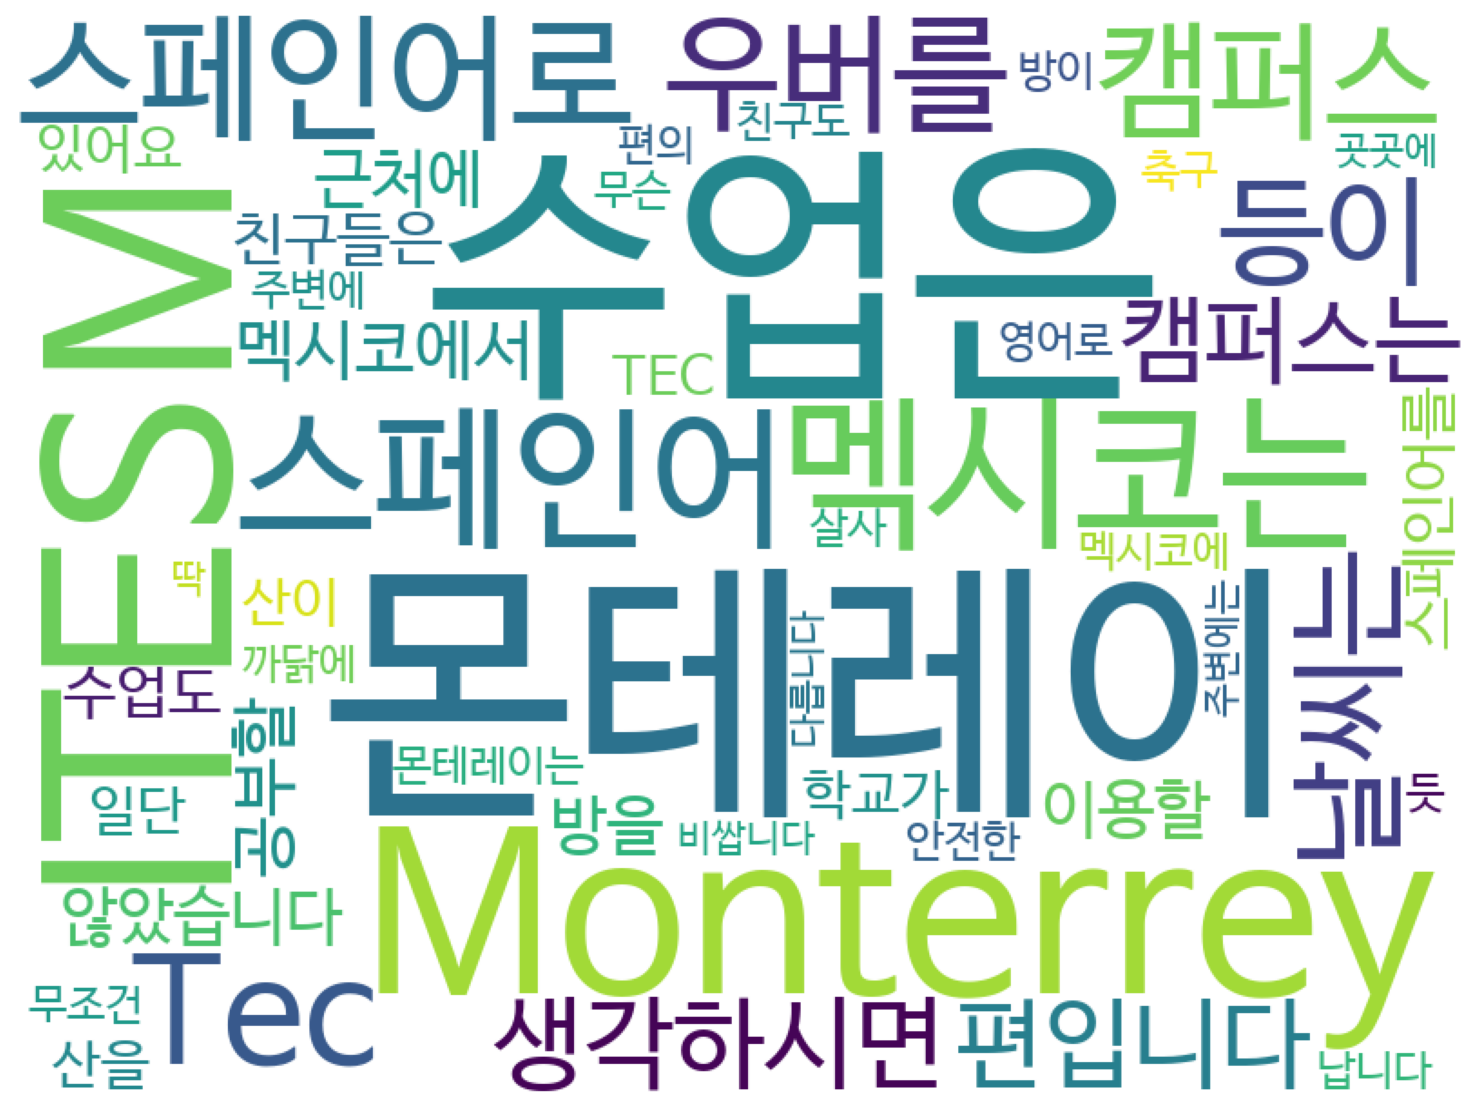

In [233]:
wordcloud.generate_from_frequencies(frequencies = common_keywords) # mecab으로 추출한 명사로 워드클라우드를 그린다.
plt.figure(figsize = (15 , 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
#이래서 전체 스탑워드 뽑은 다음에 각 학교에서 유니크한 거만 정리하는 식으로 하는 거..? 
#아니면 그냥 좋은 거에 대한 대학 0이랑 1 나눠서 그 대학들 키워드만 모아서 알아보기 그 때 그 때 스탑워드 처리.

In [199]:
word_list, frequency_list = map(list, zip(*common_gen_words))
word_list[:10]

[' ', '다', '이', '는', '니', '에', '을', '하', '고', '도']

In [200]:
# https://github.com/lovit/soynlp
from soynlp.noun import LRNounExtractor

In [201]:
from soynlp.noun import LRNounExtractor
noun_extractor = LRNounExtractor()
nouns = noun_extractor.train_extract(keywords)

[Noun Extractor] used default noun predictor; Sejong corpus predictor
[Noun Extractor] used noun_predictor_sejong
[Noun Extractor] All 2398 r features was loaded
[Noun Extractor] scanning was done (L,R) has (305, 160) tokens
[Noun Extractor] building L-R graph was done
[Noun Extractor] 47 nouns are extracted


In [226]:
nouns_counted = Counter(nouns)
print("no. gen words:", len(nouns_counted))
common_nouns = nouns_counted.most_common(100)
common_nouns

no. gen words: 47


[('몬테레이', NounScore_v1(frequency=22, score=0.9995792, known_r_ratio=1.0)),
 ('스페인어',
  NounScore_v1(frequency=21, score=0.9991529166666666, known_r_ratio=1.0)),
 ('기숙사',
  NounScore_v1(frequency=13, score=0.5259943333333333, known_r_ratio=0.9230769230769231)),
 ('공부',
  NounScore_v1(frequency=11, score=0.9952190000000001, known_r_ratio=0.5454545454545454)),
 ('파티',
  NounScore_v1(frequency=10, score=0.7938097142857142, known_r_ratio=0.875)),
 ('안전',
  NounScore_v1(frequency=9, score=0.9981421250000001, known_r_ratio=1.0)),
 ('지역',
  NounScore_v1(frequency=9, score=0.9445731111111111, known_r_ratio=1.0)),
 ('이용',
  NounScore_v1(frequency=9, score=0.87072025, known_r_ratio=0.4444444444444444)),
 ('학교',
  NounScore_v1(frequency=9, score=0.8116081111111112, known_r_ratio=1.0)),
 ('주변',
  NounScore_v1(frequency=9, score=0.7662653333333334, known_r_ratio=1.0)),
 ('아파트',
  NounScore_v1(frequency=9, score=0.7293255, known_r_ratio=0.8571428571428571)),
 ('이상',
  NounScore_v1(frequency=8, score=

In [203]:
noun_extractor.lrgraph.get_r('날씨')

[('는', 5), ('가', 1), ('를', 1), ('의', 1), ('로', 1)]

In [206]:
noun_extractor.lrgraph.get_l('식당')

[]

In [208]:
print((nouns['학교']))

NounScore_v1(frequency=9, score=0.8116081111111112, known_r_ratio=1.0)


In [121]:
print((nouns['학교']))

KeyError: '학교'

In [130]:
from soynlp.noun import LRNounExtractor_v2

noun_extractor = LRNounExtractor_v2(verbose=True)
#noun_extractor.train(sents)
#nouns = noun_extractor.extract()
nouns_eo = noun_extractor.train_extract(keywords)

[Noun Extractor] use default predictors
[Noun Extractor] num features: pos=3929, neg=2321, common=107
[Noun Extractor] counting eojeols
[EojeolCounter] n eojeol = 346 from 405 sents. mem=0.275 Gb                    
[Noun Extractor] complete eojeol counter -> lr graph
[Noun Extractor] has been trained. #eojeols=405, mem=0.275 Gb
[Noun Extractor] batch prediction was completed for 175 words
[Noun Extractor] checked compounds. discovered 0 compounds
[Noun Extractor] postprocessing detaching_features : 48 -> 48
[Noun Extractor] postprocessing ignore_features : 48 -> 44
[Noun Extractor] postprocessing ignore_NJ : 44 -> 44
[Noun Extractor] 44 nouns (0 compounds) with min frequency=1
[Noun Extractor] flushing was done. mem=0.275 Gb                    
[Noun Extractor] 35.80 % eojeols are covered


In [133]:
nouns_counted_ = Counter(nouns_eo)
print("no. gen words:", len(nouns_counted_))
common_nouns_ = nouns_counted_.most_common(100)
common_nouns_

no. gen words: 44


[('캠퍼스', NounScore(frequency=12, score=1.0)),
 ('멕시코', NounScore(frequency=12, score=1.0)),
 ('몬테레이', NounScore(frequency=9, score=1.0)),
 ('산', NounScore(frequency=8, score=1.0)),
 ('지역', NounScore(frequency=5, score=1.0)),
 ('위치해', NounScore(frequency=4, score=1.0)),
 ('겨울', NounScore(frequency=4, score=1.0)),
 ('학교', NounScore(frequency=4, score=1.0)),
 ('등산', NounScore(frequency=3, score=1.0)),
 ('날씨', NounScore(frequency=3, score=1.0)),
 ('공부', NounScore(frequency=3, score=1.0)),
 ('한국', NounScore(frequency=3, score=1.0)),
 ('지방', NounScore(frequency=3, score=1.0)),
 ('여름', NounScore(frequency=3, score=1.0)),
 ('월', NounScore(frequency=3, score=1.0)),
 ('우리나라', NounScore(frequency=2, score=1.0)),
 ('텍사스', NounScore(frequency=2, score=1.0)),
 ('주변', NounScore(frequency=2, score=1.0)),
 ('다음', NounScore(frequency=2, score=1.0)),
 ('크기', NounScore(frequency=2, score=1.0)),
 ('정도', NounScore(frequency=2, score=1.0)),
 ('중순', NounScore(frequency=2, score=1.0)),
 ('주말', NounScore(freque

In [123]:
list(noun_extractor._compounds_components.items())[:50]

[]

In [124]:
print((nouns['마약'])) #LR중요도였는데, counter library가서 순서 매겨야 함
#list 말고 숫자로밖에 순서도 ㄴ
#큐플, 숫자말고 레이블링. 
#tuple 
#generate wordcloud konlpy 

KeyError: '마약'

In [ ]:
%time df_tokens = df_column.apply(tokenizer.tokenize)

In [157]:
df_kr = pd.read_csv("/Users/jupiter/Downloads/KSM00047134-data.csv", encoding="utf-8")
df_kr.tail(30)

,#KSM00047134 1977 01 20 00 9999 5 usaf-ds3 366170 1283500
79055,30 -9999 -9999 1500 -9999 -9999 -9999 320 119
79056,30 -9999 -9999 1800 -9999 -9999 -9999 315 134
79057,30 -9999 -9999 2100 -9999 -9999 -9999 310 129
79058,30 -9999 -9999 2400 -9999 -9999 -9999 295 149
79059,30 -9999 -9999 2700 -9999 -9999 -9999 280 170
79060,30 -9999 -9999 3000 -9999 -9999 -9999 255 139
79061,#KSM00047134 2000 03 05 00 9999 10 ncdc-gts 366170 1283500
79062,01 -9999 -9999 -9999 -9999 -9999 -9999 110 10
79063,30 -9999 -9999 300 -9999 -9999 -9999 110 26
79064,30 -9999 -9999 600 -9999 -9999 -9999 115 46


In [154]:
df_geo.head()

AttributeError: 'str' object has no attribute 'head'